In [ ]:
#importamos las librerias necesarias para este proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/JFRo57/Movies-Dataset/main/deliverytime.csv")
data.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [ ]:
data.shape

(45593, 11)

In [ ]:
data.dtypes


ID                              object
Delivery_person_ID              object
Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
dtype: object

In [ ]:
#Veamos si contiene datos nulos
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [ ]:
#Ahora veremos como calcular la distancia entre dos puntos dados la latitud y la longitud, para esto existe una formula llamada Haversine
#Transformando de grados a radianes
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

#Estableciendo los parámetros para la fórmula de Haversine
def distcal(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return 6371 * c


In [ ]:
data1=data.copy()

In [ ]:
#Lo siguiente que haremos será declarar una columna para llenarla de la distancia que calcularemos
data1['distance'] = np.nan

In [ ]:
#Creamos un for que hará el recorrido en nuestras columnas para hacer el cálculo de las distancias
for i in range(len(data1)):
    data1.loc[i, 'distance'] = distcal(data1.loc[i, 'Restaurant_latitude'],
                                        data1.loc[i, 'Restaurant_longitude'],
                                        data1.loc[i, 'Delivery_location_latitude'],
                                        data1.loc[i, 'Delivery_location_longitude'])

In [ ]:
#comprobamos que se haya hecho el cálculo de las distancias?
data1.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


In [ ]:
#Crearemos una copia del data set y eliminaremos una columan que nos esta provocando problemas con el heatmap
data2=data1.copy()
data2_sin_columna= data2.drop(columns=['ID','Delivery_person_ID'])
#Luego asignaremos una eqtiqueta a cada tipo de comida
#y a cada tipo de vehiculo
label_encoder = LabelEncoder()
data2_sin_columna['Type_of_order'] = label_encoder.fit_transform(data2_sin_columna['Type_of_order'])
label_encoder2 = LabelEncoder()
data2_sin_columna['Type_of_vehicle'] = label_encoder.fit_transform(data2_sin_columna['Type_of_vehicle'])

<ipython-input-85-33131b31c8f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data2.corr()


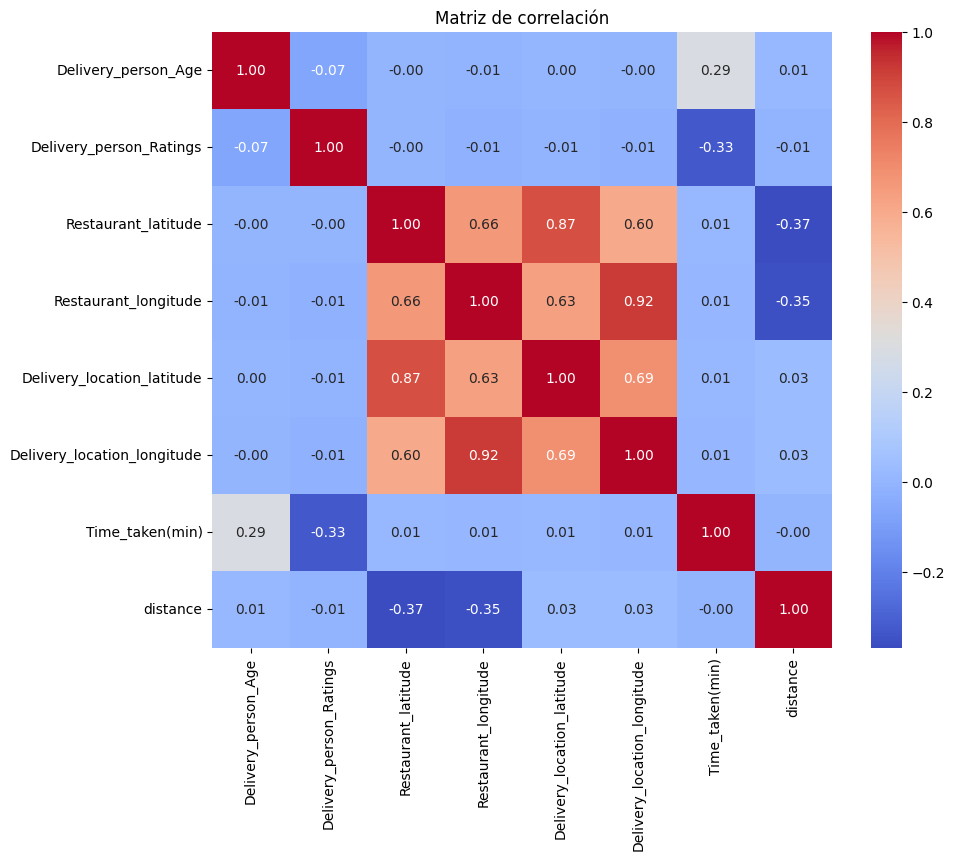

In [ ]:

#Haremos una matriz de correlación para observar de forma gráficas las variables mejor correlacionadas
correlation_matrix = data2.corr()

# Creando el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


Text(0, 0.5, 'Tiempo tomado (min)')

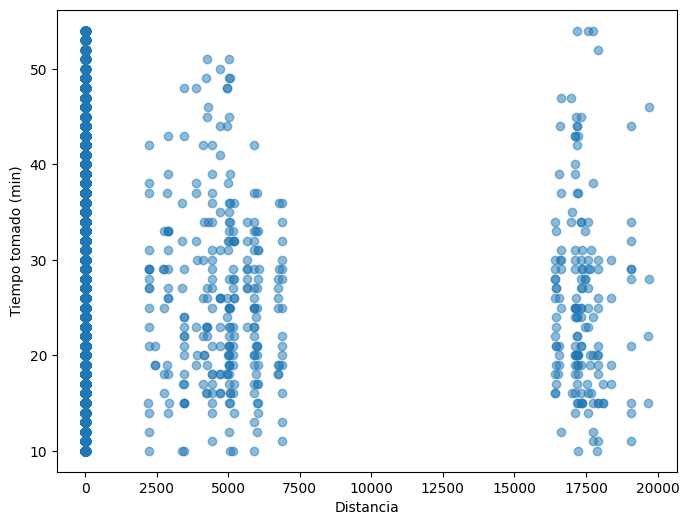

In [ ]:
#Una vez visto esto haremos una gráfica de distancia contra tiempo
plt.figure(figsize=(8, 6))
plt.scatter(data2_sin_columna['distance'], data2_sin_columna['Time_taken(min)'], alpha=0.5)
plt.xlabel('Distancia')
plt.ylabel('Tiempo tomado (min)')

Text(0, 0.5, 'Tiempo tomado (min)')

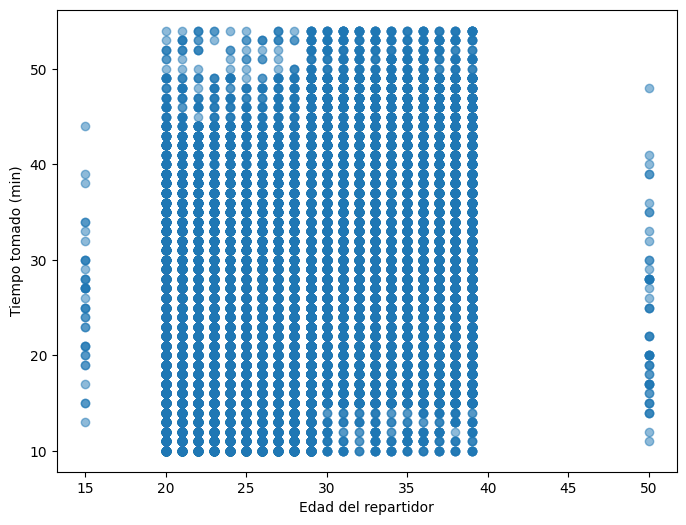

In [ ]:
#Crearemos una gráfica de la edad del repartidor vs el tiempo
plt.figure(figsize=(8, 6))
plt.scatter(data2_sin_columna['Delivery_person_Age'], data['Time_taken(min)'], alpha=0.5)
plt.xlabel('Edad del repartidor')
plt.ylabel('Tiempo tomado (min)')

Text(0, 0.5, 'Tiempo tomado (min)')

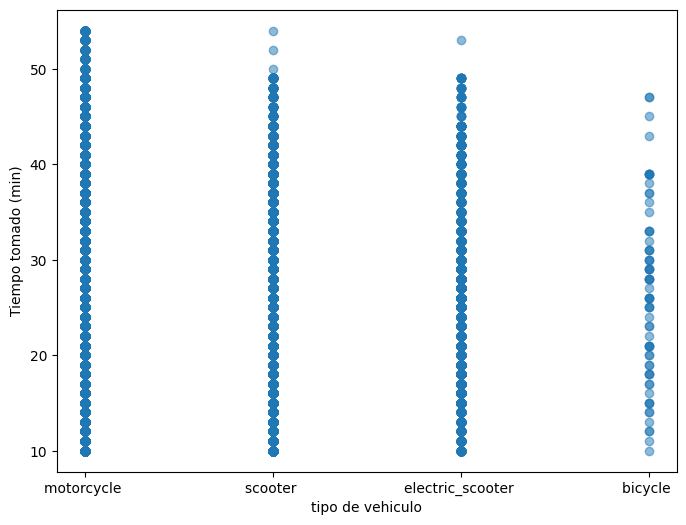

In [ ]:
#Crearemos una gráfica del tipo de vehiculo vs el tiempo
plt.figure(figsize=(8, 6))
plt.scatter(data1['Type_of_vehicle'], data1['Time_taken(min)'], alpha=0.5)
plt.xlabel('tipo de vehiculo')
plt.ylabel('Tiempo tomado (min)')

Text(0, 0.5, 'Tiempo tomado (min)')

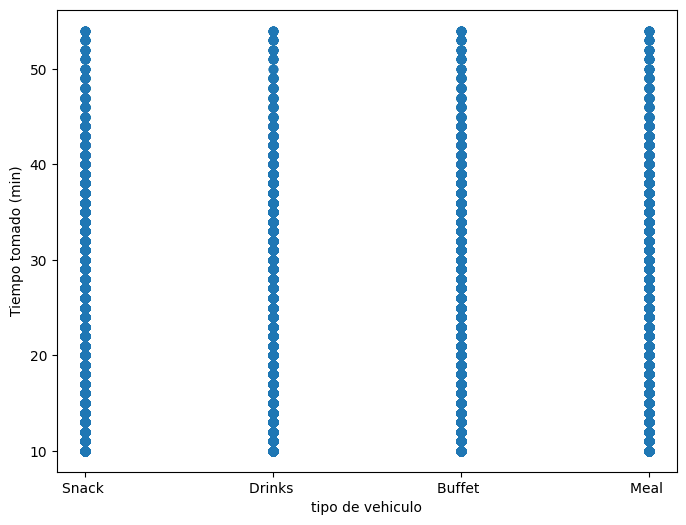

In [ ]:
#Crearemos una gráfica del tipo de comida vs el tiempo
plt.figure(figsize=(8, 6))
plt.scatter(data1['Type_of_order'], data1['Time_taken(min)'], alpha=0.5)
plt.xlabel('tipo de vehiculo')
plt.ylabel('Tiempo tomado (min)')

In [ ]:
#Establecemos la división de datos...
x = np.array(data2[["Delivery_person_Age", "Delivery_person_Ratings", "distance"]])
y = np.array(data[["Time_taken(min)"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30)

In [ ]:
# Creando el modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(xtrain, ytrain)

# Realizar predicciones en el conjunto de prueba
predictions = random_forest.predict(xtest)
mse = mean_squared_error(ytest, predictions)
print("Error cuadrático medio en el conjunto de prueba:", mse)

<ipython-input-142-03bd7bc4b330>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(xtrain, ytrain)


Error cuadrático medio en el conjunto de prueba: 67.82610467897467


In [ ]:
dato_validacion = xtest[13677]  # Tomamos un dato random real
#Usamos nuestro modelo para predecir
prediccion_dato = random_forest.predict([dato_validacion])

# Tomamos el primer valor real correspondiente al dato x anterior
valor_real = ytest[13677]

#Comprobamos la diferencia
print("Predicción del modelo:", prediccion_dato)
print("Valor real:", valor_real)

Predicción del modelo: [19.36]
Valor real: [17]
